Introduction & purpose

This project focuses on analysing patterns in fraudulent vs. legitimate transactions using statistical analysis.

Why it matters?
financial impact

Goal
My goal doing this projects is to evaluate the existings fraud detection rules; and find patterns of the fraudulent transactions.



In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


Data overview
I downloaded this data from Kaggle (link at the bottom) called PaySim which is a simulation of mobile money transactions based on a sample of real transactions. 

"NOTE: Transactions which are detected as fraud are cancelled, so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) must not be used."

based on the note above I will not be using the mentioned columns in my analysis. 


In [114]:
df = pd.read_csv('data.csv')

In [115]:
df.head()

step      type    amount  ... newbalanceDest  isFraud  isFlaggedFraud
0     1   PAYMENT   9839.64  ...            0.0        0               0
1     1   PAYMENT   1864.28  ...            0.0        0               0
2     1  TRANSFER    181.00  ...            0.0        1               0
3     1  CASH_OUT    181.00  ...            0.0        1               0
4     1   PAYMENT  11668.14  ...            0.0        0               0

[5 rows x 11 columns]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


for checking if data is clean

In [117]:
df.isnull().sum().sum()

np.int64(0)

In [118]:
df. columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [119]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [120]:
df_my_work = df.drop(columns=[
    'oldbalanceOrg',
    'newbalanceOrig', 
    'oldbalanceDest', 
    'newbalanceDest', 
])

df_my_work.head()

step      type    amount     nameOrig     nameDest  isFraud  isFlaggedFraud
0     1   PAYMENT   9839.64  C1231006815  M1979787155        0               0
1     1   PAYMENT   1864.28  C1666544295  M2044282225        0               0
2     1  TRANSFER    181.00  C1305486145   C553264065        1               0
3     1  CASH_OUT    181.00   C840083671    C38997010        1               0
4     1   PAYMENT  11668.14  C2048537720  M1230701703        0               0

Transaction Amount distribution



In [121]:
# nmuber of transactions by type
df_my_work.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

In [122]:
#total number of transactions
total_transactions = df_my_work.shape[0]

In [123]:
#percantage of frauds to the total number of transactions
fraud_count = df_my_work[df_my_work['isFraud'] == 1]['isFraud'].count()
print(fraud_count)

8213


In [124]:
#percentage of the fraud to all transactions

round(fraud_count / total_transactions * 100, 2)

np.float64(0.13)

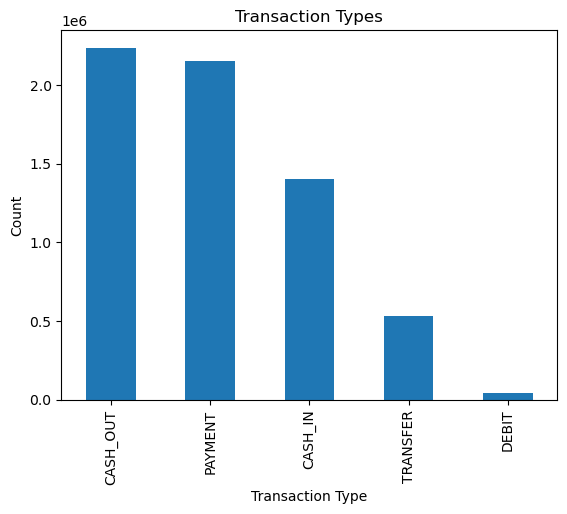

In [125]:
transaction_type_counts = df_my_work['type'].value_counts()
transaction_type_counts.plot(kind='bar', title="Transaction Types")
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


Text(0, 0.5, 'Rate')

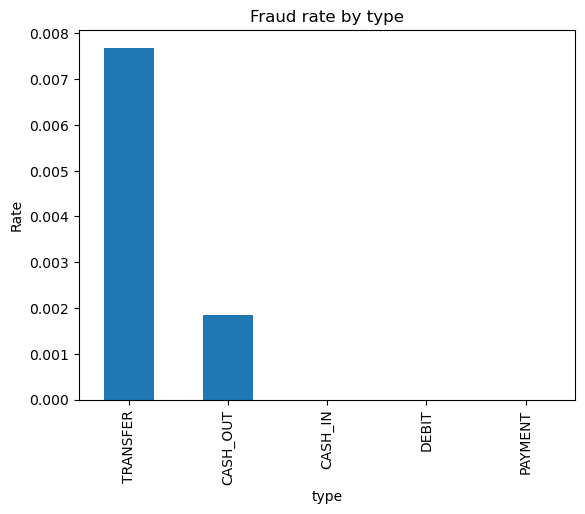

In [126]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print(fraud_by_type)
fraud_by_type.plot(kind="bar", title="Fraud rate by type")
plt.ylabel("Rate")

KDE density plot to see the distribution of the 

In [127]:
# calculating the IQR of amounts
amount_quartiles = df_my_work['amount'].quantile([0.25, 0.75])
iqr = amount_quartiles[0.75] - amount_quartiles[0.25]
lower_bound = max(0, amount_quartiles[0.25] - 1.5 * iqr)
upper_bound = amount_quartiles[0.75] + 1.5 * iqr
print(iqr)
print(lower_bound)
print(upper_bound)

195331.9075
0
501719.33875


In [128]:
df_my_work['amount'].max()

92445516.64

In [129]:
df_my_work["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

Text(0.5, 0, 'Log(Amount + 1)')

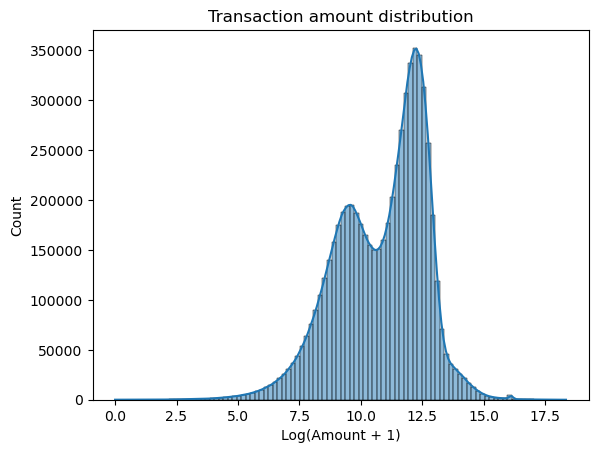

In [131]:
sb.histplot(np.log1p(df_my_work["amount"]), bins=100, kde = True)
plt.title("Transaction amount distribution")
plt.xlabel("Log(Amount + 1)")

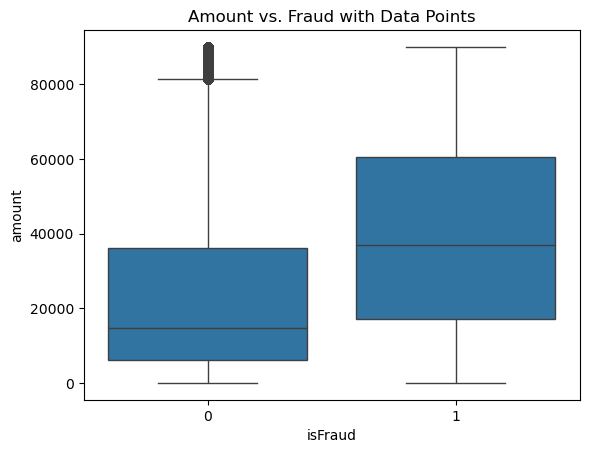

In [150]:
sb.boxplot(data=df_my_work[df_my_work["amount"] < 90000], x="isFraud", y="amount")
plt.title("Amount vs. Fraud with Data Points")
plt.show()
